# Exploratory Data Analysis

### important Points 
- EDA can be leveraged to check for outliers, patterns, and trends in the given data.
- EDA helps to find meaningful patterns in data.
- EDA provides in-depth insights into the data sets to solve our business problems.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn as sns
from textblob import TextBlob 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
# Opening the text  file in read mode
with open("output.txt", 'r') as file:
    # Read the contents of the file
    data = file.read()

In [3]:
# printing the total length of the document
len(data)

331724

In [4]:
# reading the text in csv mode
df = pd.read_csv('output.txt', header=None, names=['content'])

In [5]:
# printing the first 5 rows of the document
df.head()

,content
0,projectsnew eventsvisitsabout internship fsm p...
1,projectsnew eventsvisitsabout internship fsm p...
2,projectsnew eventsvisitsabout
3,projectsnew eventsvisitsabout
4,projectsnew eventsvisitsabout


In [6]:
# printing the last 5 rows of the document
df.tail()

,content
2132,infoiafsmin
2133,projectsnew eventsvisitsabout
2134,projectsnew eventsvisitsabout
2135,projectsnew eventsvisitsabout
2136,projectsnew eventsvisitsabout


### Statistical description of the document

In [7]:
# adding a column total words in the document
df['TotalWords'] = df['content'].str.split().str.len()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     2137 non-null   object
 1   TotalWords  2137 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.5+ KB


In [9]:
df.describe()

,TotalWords
count,2137.000000
mean,21.177819
std,64.342557
min,1.000000
25%,2.000000
50%,3.000000
75%,22.000000
max,958.000000


In [10]:
df.isnull().sum()

content       0
TotalWords    0
dtype: int64

In [11]:
df.nunique()

content       321
TotalWords     78
dtype: int64

### Data Preprocessing

In [12]:
# Lowercasing
data = [text.lower() for text in data]

In [13]:
# removing extra things
import re
data = [re.sub('[^a-zA-Z]', ' ', text) for text in data]

In [14]:
#  most common words in the document
from collections import Counter
word_counter = Counter("".join(data).split())
print(word_counter.most_common(10))

[('industri', 1380), ('smart', 1206), ('manufactur', 1162), ('learn', 666), ('technolog', 651), ('autom', 565), ('fsm', 491), ('program', 450), ('project', 441), ('foundat', 429)]


In [15]:
# tokenzing words from the document
tokenized_data = [word_tokenize(text) for text in data]

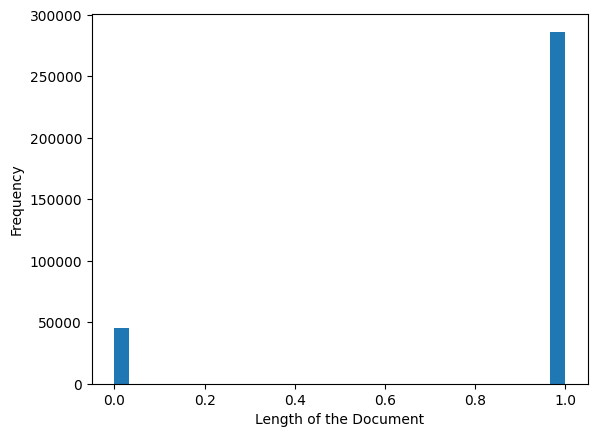

In [16]:
# document length graph
document_lengths = [len(text.split()) for text in data]
plt.hist(document_lengths, bins=30)
plt.xlabel('Length of the Document')
plt.ylabel('Frequency')
plt.show()

In [17]:
# printing the tokens
# tokenized_dat

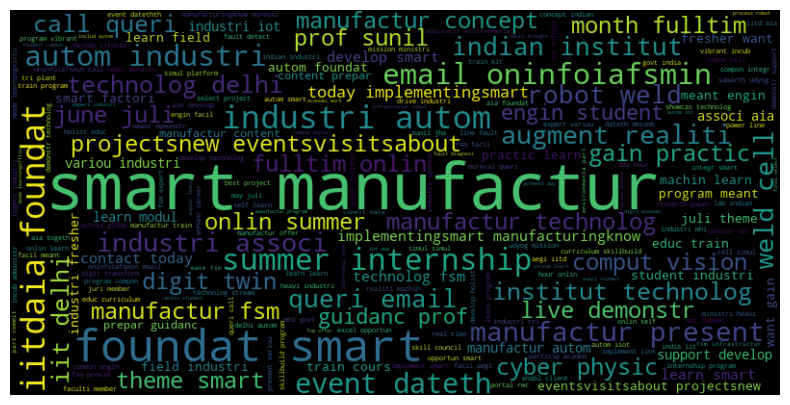

In [18]:
# making a wordcloud
wordcloud = WordCloud(width=800, height=400).generate("".join(data))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

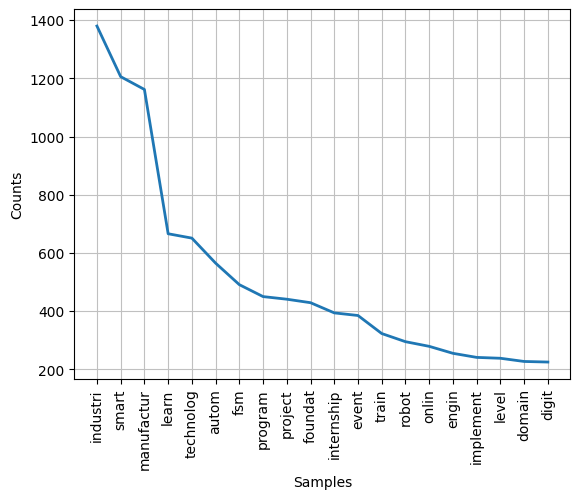

<Axes: xlabel='Samples', ylabel='Counts'>

In [19]:
# string frequency graph
word_frequencies = nltk.FreqDist("".join(data).split())
word_frequencies.plot(20)

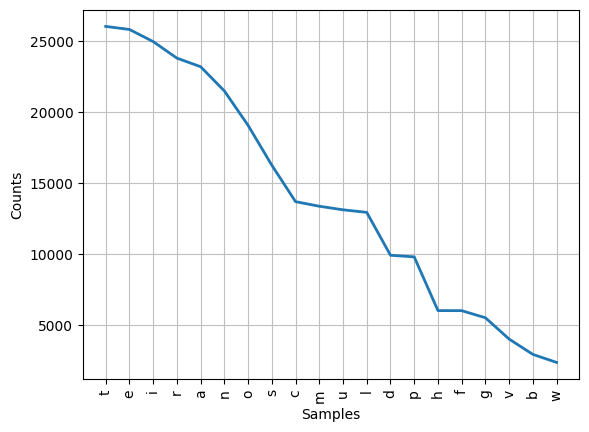

<Axes: xlabel='Samples', ylabel='Counts'>

In [20]:
# word frequency graph
word_frequencies = nltk.FreqDist(" ".join(data).split())
word_frequencies.plot(20)

In [21]:
# average document length
document_lengths = [len(text.split()) for text in data]
average_document_length = np.mean(document_lengths)
print("Average Document Length:", average_document_length)

Average Document Length: 0.8633683423568991


In [22]:
# unique words in the document
unique_words = set(" ".join(data).split())
print("Number of Unique Words:", len(unique_words))

Number of Unique Words: 26


In [23]:
# unique strings in the document
unique_string = set("".join(data).split())
print("Number of Unique strings:", len(unique_string))

Number of Unique strings: 985


In [24]:
# n-gram
from nltk.util import ngrams
# bi-grams
n = 2  
top_ngrams = Counter(ngrams(" ".join(data).split(), n)).most_common(10)
print(top_ngrams)

[(('i', 'n'), 6994), (('a', 'r'), 4809), (('m', 'a'), 4319), (('e', 'r'), 4297), (('n', 't'), 4142), (('s', 't'), 4062), (('t', 'e'), 3760), (('r', 'i'), 3678), (('c', 't'), 3630), (('r', 'o'), 3366)]


In [25]:
# Performing sentiment analysis
text = str(data)
blob = TextBlob(text)
sentiment_score = blob.sentiment.polarity
# Classifying sentiment based on the score
if sentiment_score > 0:
    sentiment_label = "Positive"
elif sentiment_score < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"

print("Sentiment Score: ", sentiment_score)
print("Sentiment Label: ", sentiment_label)

Sentiment Score:  0.0
Sentiment Label:  Neutral


In [26]:
# defining categorical variable and numerical variable 
col1=df.select_dtypes(include=['object']).columns
col2 = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(col1)
print("Numerical Variables:")
print(col2)

Categorical Variables:
Index(['content'], dtype='object')
Numerical Variables:
['TotalWords']


TotalWords
skew:  10.25


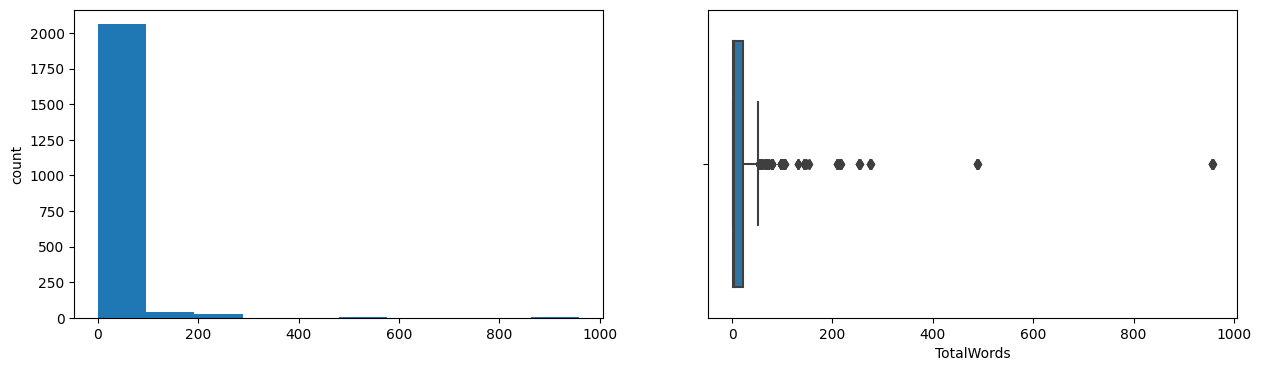

In [27]:
for col in col2:
    print(col)
    print('skew: ',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

In [28]:
print(df.columns)

Index(['content', 'TotalWords'], dtype='object')


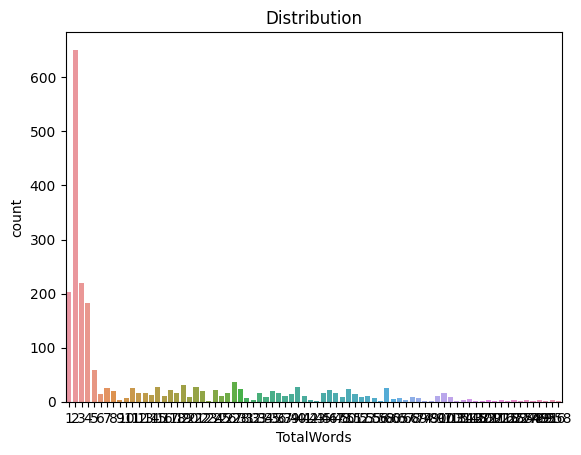

In [29]:
sns.countplot(x='TotalWords',data=df)
plt.title("Distribution")
plt.show()

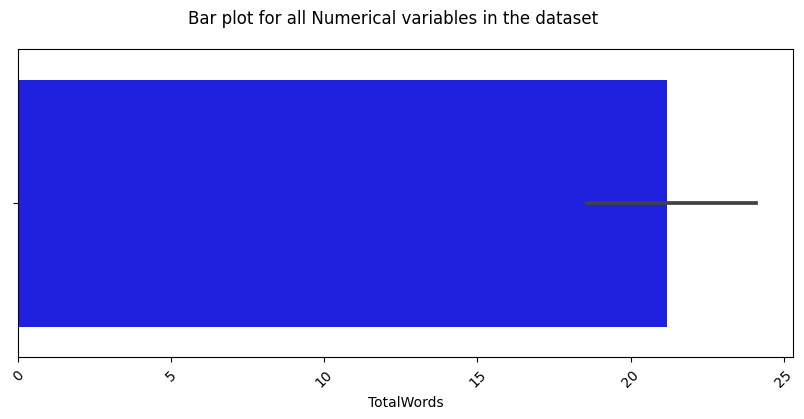

In [30]:
fig= plt.figure(figsize=(10,4))
axes = fig.subplots(1,1)
fig.suptitle('Bar plot for all Numerical variables in the dataset')

sns.barplot(ax=axes, x='TotalWords', data=df, color='blue', order=df['TotalWords'].value_counts().index)

axes.tick_params(labelrotation=45)

plt.show()


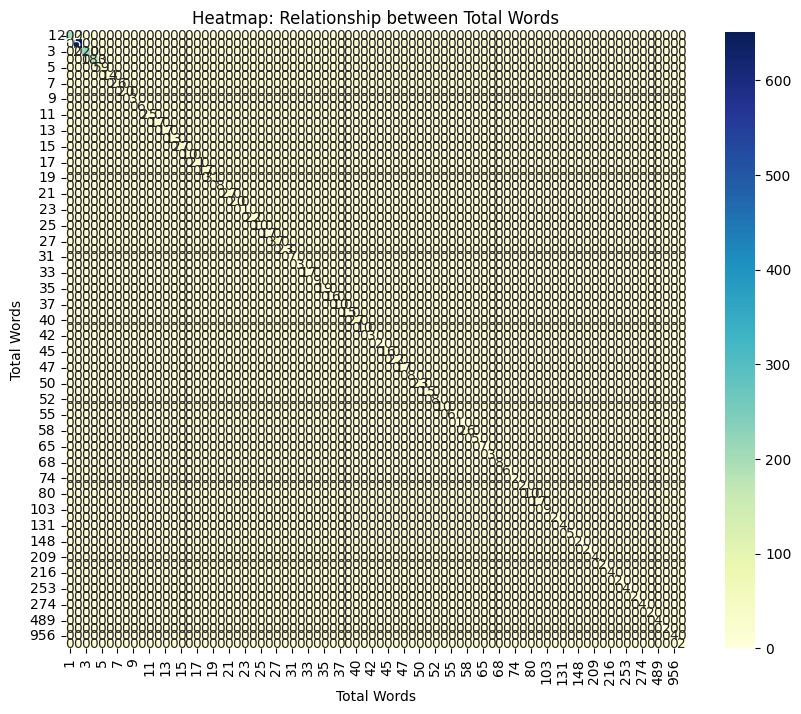

In [31]:
# Create a pivot table
pivot_table = df.pivot_table(index='TotalWords', columns='TotalWords', aggfunc='size', fill_value=0)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap: Relationship between Total Words')
plt.xlabel('Total Words')
plt.ylabel('Total Words')
plt.show()